# Analisis de un fichero OPTA

En este análisis, vamos a utilizar un fichero de OPTA  correspondiente a la temporada **2020-2021 de LALIGA**.

## Contenido del análisis

 - **Ranking de goleadores** .  
 - **Ranking de equipos con más tarjetas**.
 - **Goles por posición** 
 - **Tarjetas por posición**s 
 - **Goles de Karim Benzema y Lionel Messi**.
 - **Atlético de Madrid – Cádiz CF  de fecha 31-enero-2021**. (
 



In [2]:
def pintar_campo(color_campo):
    """
    Dibuja un campo de fútbol utilizando Matplotlib.

    Arguments:
        color_campo (str): Color de las líneas del campo. Debe ser un valor válido de Matplotlib,
            como un nombre de color ('black', 'white', etc.) o un código hexadecimal ('#FFFFFF').

    Returns:
        matplotlib.axes._axes.Axes: Objeto de ejes con el campo de fútbol dibujado.

    Raises:
        Exception: Si el color proporcionado no es válido para Matplotlib.
    """
    ax = plt.axes()
    bottom, width, lenght = 0., 100, 100

    pitch_width, pitch_length = 68., 105

    goal_width, goal_length, goal_bottom, goal_top = 10.76, 1.9, 44.62, 55.38

    six_yard_width, six_yard_length, six_yard_left = 26.4, 5.8, 5.8
    six_yard_right, six_yard_bottom, six_yard_top = 94.2, 36.8, 63.2

    penalty_left, penalty_right = 11.5, 88.5
    penalty_area_width, penalty_area_length, penalty_area_left = 57.8, 17.0, 17.0
    penalty_area_right, penalty_area_bottom, penalty_area_top = 83.0, 21.1, 78.9

    center_width, center_length, circle_diameter = 50.0, 50, 17.68

    coord_x = [
        center_length, center_length, width, width,
        penalty_area_right, penalty_area_right, width,
        width, six_yard_right, six_yard_right, width,
        width, bottom, bottom, penalty_area_left,
        penalty_area_left, bottom, bottom, six_yard_left,
        six_yard_left, bottom, bottom, center_length,
    ]
    coord_y = [
        bottom, lenght, lenght, penalty_area_bottom,
        penalty_area_bottom, penalty_area_top, penalty_area_top,
        six_yard_bottom, six_yard_bottom, six_yard_top,
        six_yard_top, bottom, bottom, penalty_area_top,
        penalty_area_top, penalty_area_bottom, penalty_area_bottom,
        six_yard_top, six_yard_top, six_yard_bottom,
        six_yard_bottom, lenght, lenght,
    ]

    plt.plot(coord_x, coord_y, color_campo)
    circulo_central = plt.Circle((50, 50), radius=10, fill=False, color=color_campo)
    ax.add_patch(circulo_central)

    circulo_central = plt.Circle((50, 50), radius=0.5, fill=True, color=color_campo)
    ax.add_patch(circulo_central)

    punto_penalti1 = plt.Circle((11, 50), radius=0.5, fill=True, color=color_campo)
    ax.add_patch(punto_penalti1)

    punto_penalti2 = plt.Circle((89, 50), radius=0.5, fill=True, color=color_campo)
    ax.add_patch(punto_penalti2)

    arq_izq = Arc((11, 50), 20, 20, theta1=310, theta2=50, color=color_campo)
    arq_dcho = Arc((89, 50), 20, 20, theta1=130, theta2=230, color=color_campo)
    ax.add_patch(arq_izq)
    ax.add_patch(arq_dcho)

    plt.plot(coord_x, coord_y, color_campo)
    return ax


# Importa las librerías y el fichero.


In [5]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib.patches import Arc, Circle

In [7]:
df = pd.read_csv("eventos_2020_2021.csv")

# 1. Ranking de goles
El ranking de goles es el listado de mayor a menor del total de goles marcados por cada jugador

In [10]:
uno= df[['type_id','player']]
mask1= (
    (df['type_id']==16)
)
df_ranking= uno[mask1]

df_ranking.loc[df['player'].duplicated(), "player"].value_counts()

player
Lionel Messi         30
Luis Suárez          26
Karim Benzema        23
Gerard Moreno        23
Youssef En-Nesyri    18
                     ..
Bruno González        1
Stefan Savic          1
Rubén Sobrino         1
Sergio Postigo        1
Denis Vavro           1
Name: count, Length: 273, dtype: int64

# 2. Ranking de tarjetas por equipos
El ranking de tarjetas es el listado de mayor a menor del total de tarjetas que tiene cada equipo

In [13]:
dos= df[['type_id','team']]
mask2= (
    (df['type_id']==17)
)
df_tarjetas= dos[mask2]

df_tarjetas.loc[df['team'].duplicated(), "team"].value_counts()

team
Getafe                126
Celta de Vigo         107
Granada CF            103
Atletico de Madrid     98
Alaves                 96
Real Valladolid        95
Real Betis             95
Elche CF               93
Athletic Club          85
Real Sociedad          82
Valencia CF            82
Cadiz CF               82
C.A. Osasuna           82
Sevilla                79
Barcelona              72
Villarreal             71
Levante                70
Huesca                 69
Eibar                  67
Real Madrid            60
Name: count, dtype: int64

# 3. **Diagrama de barras** goles marcados por posición. 

/Users/rogersans/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


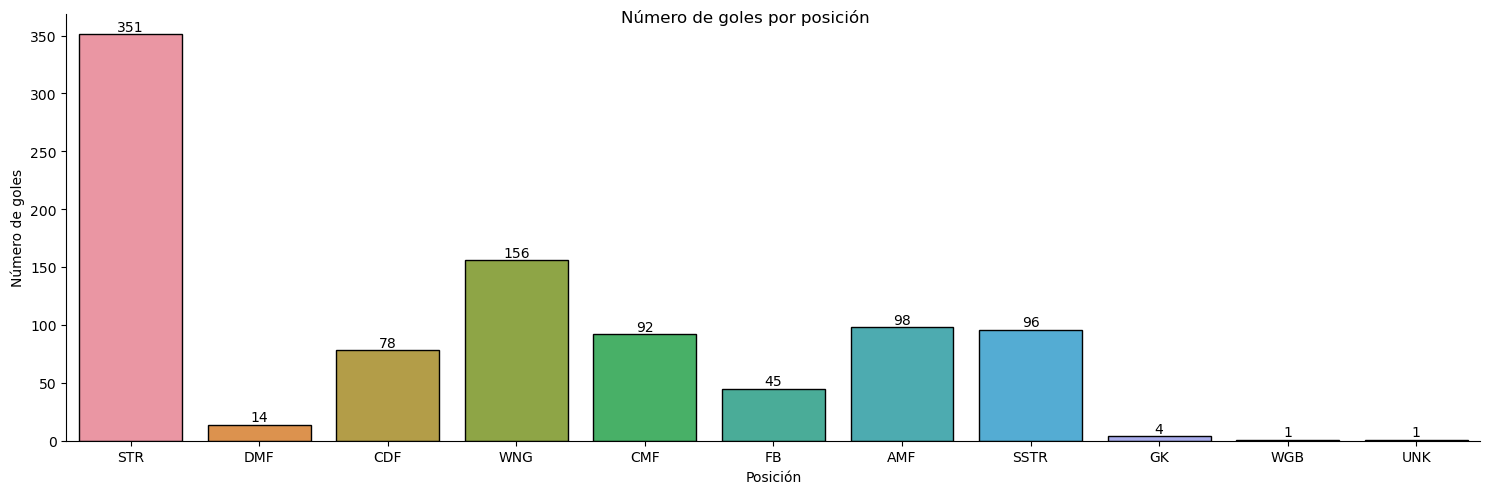

In [16]:
tres= df[['type_id','real_position']]
mask3= (
    (df['type_id']==16)
)
df_real_position_goals= tres[mask3]

sns_plot = sns.catplot(x='real_position', data= df_real_position_goals, kind="count", height=5,
                          aspect=3, edgecolor='black');

positionList = ['STR','DMF','CDF','WNG',
             'CMF','FB','AMF','SSTR',
             'GK','WGB','UNK']

sns_plot.set_xticklabels(positionList)
sns_plot.fig.suptitle("Número de goles por posición")
sns_plot.set_ylabels("Número de goles")
sns_plot.set_xlabels("Posición")

ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
            '{0}'.format(int(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')
plt.show()

# 4. **Gráfico de barras** número de tarjetas por posición. 

/Users/rogersans/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


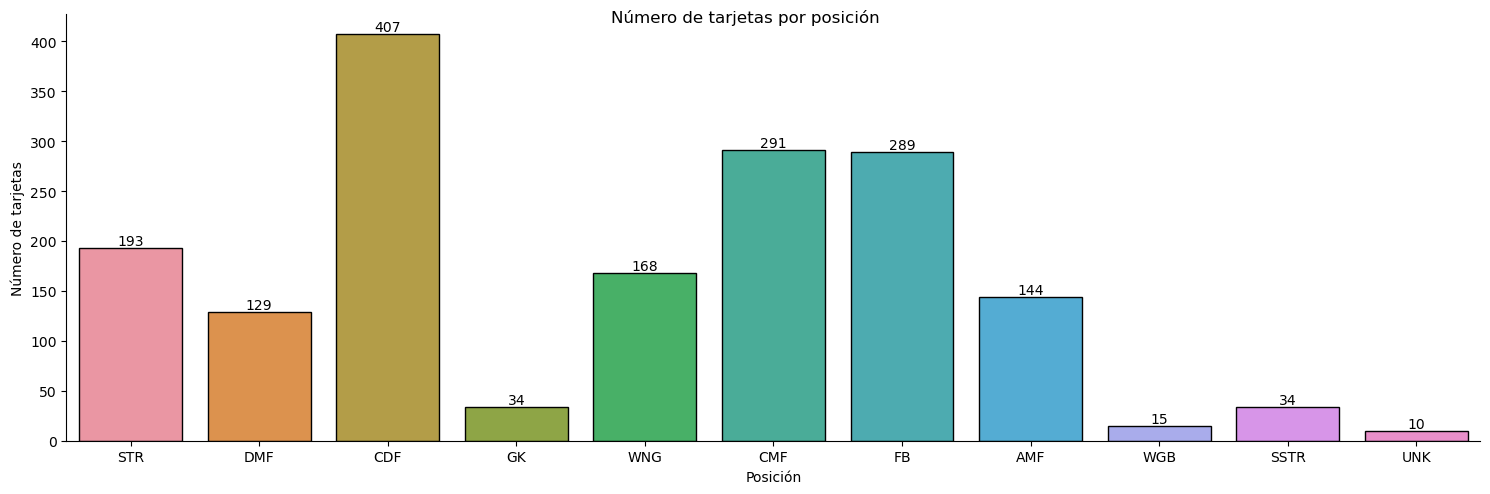

In [19]:
cuatro= df[['type_id','real_position']]
mask4= (
    (df['type_id']==17)
)
df_real_position_cards= cuatro[mask4]

sns_plot = sns.catplot(x='real_position', data= df_real_position_cards, kind="count", height=5,
                          aspect=3, edgecolor='black');

positionList = ['STR','DMF','CDF','GK',
             'WNG','CMF','FB','AMF',
             'WGB','SSTR','UNK']

sns_plot.set_xticklabels(positionList)
sns_plot.fig.suptitle("Número de tarjetas por posición")
sns_plot.set_ylabels("Número de tarjetas")
sns_plot.set_xlabels("Posición")

ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
            '{0}'.format(int(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')
plt.show()

# 5. Representación en campo de los **goles de la temporada Karim Benzema y Lionel Messi**.

In [22]:
mask5= (
    (df['type_id']==16)
)
df_5= df[mask5]

df_messi = df_5[df_5['player']== 'Lionel Messi'].copy()
df_benzema = df_5[df_5['player']== 'Karim Benzema'].copy()

<Axes: title={'center': 'Goles de Messi y Benzema'}, xlabel='x', ylabel='y'>

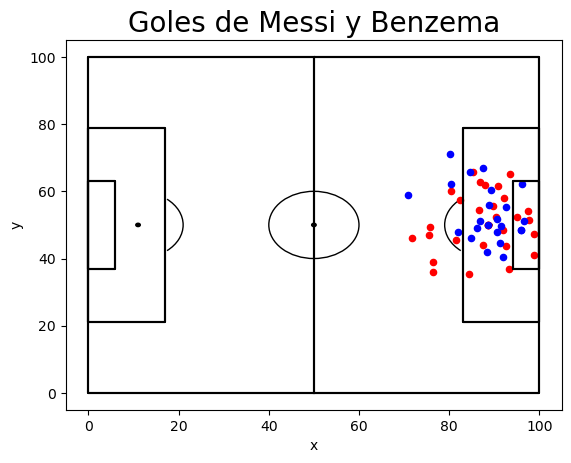

In [24]:
color_campo = '#000000'
ax_campo = pintar_campo(color_campo)
ax_campo.set_title("Goles de Messi y Benzema",
             fontsize=20)

df_messi.plot(kind='scatter', x='x', y='y', color='red', ax = ax_campo)
df_benzema.plot(kind='scatter', x='x', y='y', color='blue', ax= ax_campo)

# 6. Partido Atlético de Madrid – Cádiz CF 31-enero-2021. 

In [27]:
lst_cad_atm = ['Cadiz CF','Atletico de Madrid']
df_1 = df[df['team'].isin(lst_cad_atm)]

mask6= (
    (df['year']==2021) &
    (df['month']==1) &
    (df['day']==31)
)

df_cad_atm= df_1[mask6]
df_cad_atm

/var/folders/5p/fg2fchnj2_d51s_pprx1zmyr0000gn/T/ipykernel_52100/630933250.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cad_atm= df_1[mask6]


,type_id,timestamp,x,y,real_position,player,team,year,month,day
44990,67,2021-01-31T15:25:30.253,75.4,50.6,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
44991,1,2021-01-31T15:25:30.262,76.4,48.7,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
44992,1,2021-01-31T15:26:48.440,33.6,4.0,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
44993,1,2021-01-31T15:26:50.742,35.1,1.3,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
44994,1,2021-01-31T15:27:09.878,67.0,37.1,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
...,...,...,...,...,...,...,...,...,...,...
644613,1,2021-01-31T17:01:08.314,62.7,21.0,Striker,Ivan Saponjic,Cadiz CF,2021,1,31
644614,1,2021-01-31T17:02:19.330,65.9,41.2,Striker,Ivan Saponjic,Cadiz CF,2021,1,31
644615,44,2021-01-31T17:02:45.817,87.7,44.6,Striker,Ivan Saponjic,Cadiz CF,2021,1,31
644616,61,2021-01-31T17:02:45.954,87.6,43.9,Striker,Ivan Saponjic,Cadiz CF,2021,1,31


In [29]:
print(df_cad_atm.shape)

(1804, 10)


# 7. Goles del partido 

In [32]:
siete= df_cad_atm[['team','player','timestamp']]
mask7= (
    (df_cad_atm['type_id']==16)
)
df_goles_cad_atm= df_cad_atm[mask7]

df_goles_cad_atm

,type_id,timestamp,x,y,real_position,player,team,year,month,day
45000,16,2021-01-31T15:43:46.086,74.2,57.3,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
45014,16,2021-01-31T16:28:17.643,88.5,50.0,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
47574,16,2021-01-31T17:05:55.413,90.5,54.2,Central Midfielder,Jorge Resurrección,Atletico de Madrid,2021,1,31
100067,16,2021-01-31T16:00:23.295,92.4,42.1,Central Midfielder,Saúl Ñíguez,Atletico de Madrid,2021,1,31
226639,16,2021-01-31T15:50:30.693,84.9,27.4,Striker,Álvaro Negredo,Cadiz CF,2021,1,31
226668,16,2021-01-31T16:49:04.930,90.5,51.0,Striker,Álvaro Negredo,Cadiz CF,2021,1,31


# 8. Representación en campo de los goles.

<Axes: title={'center': 'Goles Cadiz vs Atletico de Madrid'}, xlabel='x', ylabel='y'>

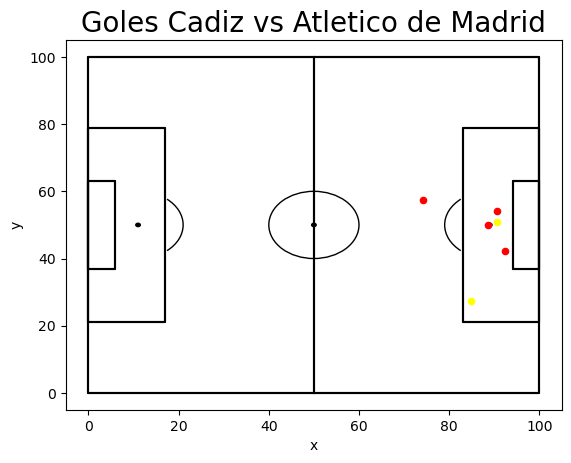

In [35]:
df_goles_cad= df_goles_cad_atm[df_goles_cad_atm['team']=='Cadiz CF']
df_goles_atm= df_goles_cad_atm[df_goles_cad_atm['team']=='Atletico de Madrid']

color_campo = '#000000'
ax_campo = pintar_campo(color_campo) 
ax_campo.set_title("Goles Cadiz vs Atletico de Madrid",
             fontsize=20)



df_goles_cad.plot(kind='scatter', x='x', y='y', color='yellow', ax = ax_campo)
df_goles_atm.plot(kind='scatter', x='x', y='y', color='red', ax = ax_campo)

# 9. Posición media de los jugadores del Atlético de Madrid.


In [50]:
mask9=(
    df_cad_atm['team']=='Atletico de Madrid'
)

df_atm= df_cad_atm[mask9]

df_atm

,type_id,timestamp,x,y,real_position,player,team,year,month,day
44990,67,2021-01-31T15:25:30.253,75.4,50.6,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
44991,1,2021-01-31T15:25:30.262,76.4,48.7,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
44992,1,2021-01-31T15:26:48.440,33.6,4.0,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
44993,1,2021-01-31T15:26:50.742,35.1,1.3,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
44994,1,2021-01-31T15:27:09.878,67.0,37.1,Striker,Luis Suárez,Atletico de Madrid,2021,1,31
...,...,...,...,...,...,...,...,...,...,...
596752,12,2021-01-31T17:07:21.780,20.0,8.5,Attacking Midfielder,Héctor Herrera,Atletico de Madrid,2021,1,31
596753,5,2021-01-31T17:07:22.767,19.8,-1.2,Attacking Midfielder,Héctor Herrera,Atletico de Madrid,2021,1,31
596754,12,2021-01-31T17:07:48.598,14.3,59.0,Attacking Midfielder,Héctor Herrera,Atletico de Madrid,2021,1,31
596755,1,2021-01-31T17:12:45.163,79.6,92.1,Attacking Midfielder,Héctor Herrera,Atletico de Madrid,2021,1,31


In [54]:
df_atm_jugadores = df_atm.select_dtypes(include=['number']).groupby(df_atm['player']).mean().round(1)
df_atm_jugadores

,type_id,x,y,year,month,day
player,,,,,,
Felipe Augusto de Almeida Monteiro,12.5,31.4,63.9,2021.0,1.0,31.0
Geoffrey Kondogbia,31.1,18.2,41.3,2021.0,1.0,31.0
Héctor Herrera,8.3,35.4,42.4,2021.0,1.0,31.0
Jan Oblak,13.5,9.5,47.6,2021.0,1.0,31.0
Jorge Resurrección,12.2,42.3,40.3,2021.0,1.0,31.0
José Giménez,10.1,31.9,62.3,2021.0,1.0,31.0
João Félix Sequeira,13.5,64.2,31.8,2021.0,1.0,31.0
Lucas Torreira,8.2,44.7,56.9,2021.0,1.0,31.0
Luis Suárez,12.7,61.5,49.6,2021.0,1.0,31.0


<Axes: title={'center': 'Posicion media de los jugadores del Atletico de Madrid'}, xlabel='x', ylabel='y'>

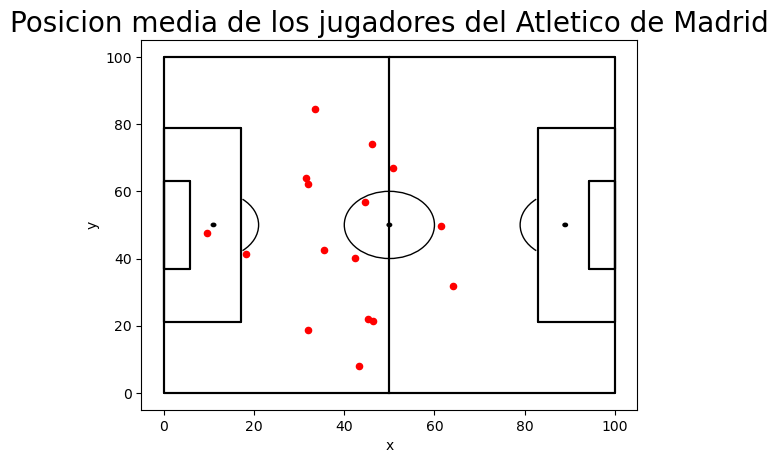

In [56]:
color_campo = '#000000'
ax_campo = pintar_campo(color_campo) 
ax_campo.set_title("Posicion media de los jugadores del Atletico de Madrid",
             fontsize=20)

df_atm_jugadores.plot(kind='scatter', x='x', y='y', color='red', ax = ax_campo)


## 10. Porcentaje de eventos generado en cada una de las siguientes zonas:
Zonas: 
 - x <= 17 (zona1)
 - x > 17 y x <=50 (zona2)
 - x>50 y x <=83 (zona3)
 - x>83 (zona4). 

In [60]:
mask10=(
    df_cad_atm['team']=='Cadiz CF'
)

df_cad= df_cad_atm[mask10]

df_cad

,type_id,timestamp,x,y,real_position,player,team,year,month,day
215802,1,2021-01-31T15:16:28.598,29.9,53.3,Central Defender,Juan Torres Ruiz,Cadiz CF,2021,1,31
215803,1,2021-01-31T15:16:41.813,34.2,62.6,Central Defender,Juan Torres Ruiz,Cadiz CF,2021,1,31
215804,1,2021-01-31T15:18:56.254,54.2,96.3,Central Defender,Juan Torres Ruiz,Cadiz CF,2021,1,31
215805,67,2021-01-31T15:19:38.037,34.8,69.7,Central Defender,Juan Torres Ruiz,Cadiz CF,2021,1,31
215806,8,2021-01-31T15:19:38.041,33.8,76.4,Central Defender,Juan Torres Ruiz,Cadiz CF,2021,1,31
...,...,...,...,...,...,...,...,...,...,...
644613,1,2021-01-31T17:01:08.314,62.7,21.0,Striker,Ivan Saponjic,Cadiz CF,2021,1,31
644614,1,2021-01-31T17:02:19.330,65.9,41.2,Striker,Ivan Saponjic,Cadiz CF,2021,1,31
644615,44,2021-01-31T17:02:45.817,87.7,44.6,Striker,Ivan Saponjic,Cadiz CF,2021,1,31
644616,61,2021-01-31T17:02:45.954,87.6,43.9,Striker,Ivan Saponjic,Cadiz CF,2021,1,31


In [66]:
Zona1= df_cad[df_cad['x']<=17].count() / df_cad.count() *100
Zona2= df_cad[(df_cad['x']>17) & (df_cad['x']<=50)].count() / df_cad.count() *100
Zona3= df_cad[(df_cad['x']>50) & (df_cad['x']<=83)].count() / df_cad.count() *100
Zona4= df_cad[df_cad['x']>83].count() / df_cad.count() *100

print("Cádiz -> " "Zona1:", Zona1['x'].round(2), "%" , 
"Zona2:", Zona2['x'].round(2), "%" ,
"Zona3:", Zona3['x'].round(2), "%" ,
"Zona4:", Zona4['x'].round(2), "%")


Cádiz -> Zona1: 15.9 % Zona2: 31.35 % Zona3: 44.16 % Zona4: 8.58 %


In [68]:
Zona1= df_atm[df_atm['x']<=17].count() / df_atm.count() *100
Zona2= df_atm[(df_atm['x']>17) & (df_atm['x']<=50)].count() / df_atm.count() *100
Zona3= df_atm[(df_atm['x']>50) & (df_atm['x']<=83)].count() / df_atm.count() *100
Zona4= df_atm[df_atm['x']>83].count() / df_atm.count() *100

print("Atlético -> " "Zona1:", Zona1['x'].round(2), "%" , 
"Zona2:", Zona2['x'].round(2), "%" ,
"Zona3:", Zona3['x'].round(2), "%" ,
"Zona4:", Zona4['x'].round(2), "%")

Atlético -> Zona1: 19.25 % Zona2: 46.45 % Zona3: 27.53 % Zona4: 6.77 %


# 11. Eventos en los que participó **Luis Suárez** por zonas

In [71]:
df_luis_suarez= df_atm[df_atm['player']== "Luis Suárez"]
df_luis_suarez_Zona1= df_luis_suarez[df_luis_suarez['x']<=17]
df_luis_suarez_Zona2= df_luis_suarez[(df_luis_suarez['x']>=17) & (df_luis_suarez['x']<=50)]
df_luis_suarez_Zona3= df_luis_suarez[(df_luis_suarez['x']>=50) & (df_luis_suarez['x']<=83)]
df_luis_suarez_Zona4= df_luis_suarez[df_luis_suarez['x']>83]

<Axes: title={'center': 'Eventos Luis Suárez'}, xlabel='x', ylabel='y'>

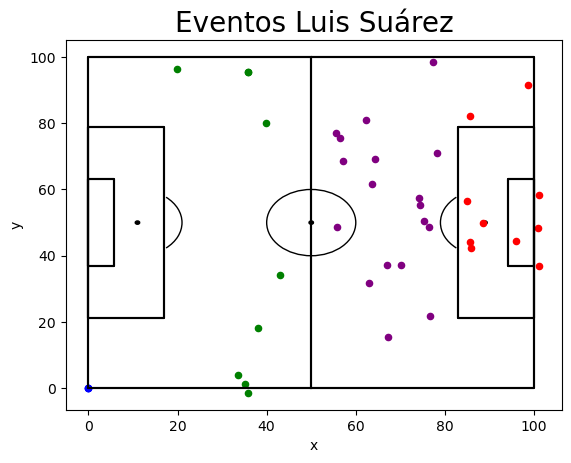

In [73]:
color_campo = '#000000'
ax_campo = pintar_campo(color_campo) 
ax_campo.set_title("Eventos Luis Suárez",
             fontsize=20)

df_luis_suarez_Zona1.plot(kind='scatter', x='x', y='y', color='blue', ax = ax_campo)
df_luis_suarez_Zona2.plot(kind='scatter', x='x', y='y', color='green', ax = ax_campo)
df_luis_suarez_Zona3.plot(kind='scatter', x='x', y='y', color='purple', ax = ax_campo)
df_luis_suarez_Zona4.plot(kind='scatter', x='x', y='y', color='red', ax = ax_campo)

# 12. Pases por equipo


<Axes: title={'center': 'Pases Atletico de Madrid'}, xlabel='x', ylabel='y'>

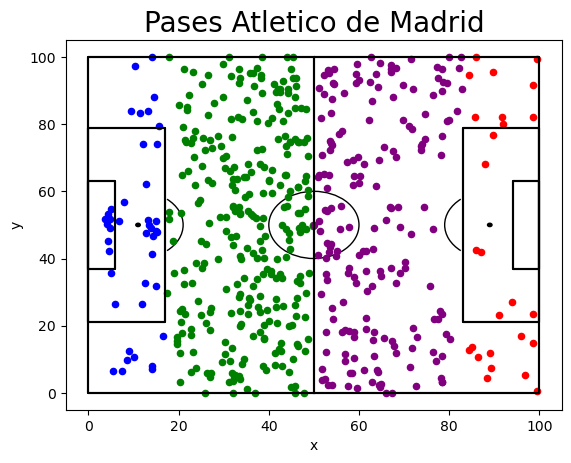

In [78]:
mask12= (
      (df_atm['type_id']==1)
)  

df_atm_pases = df_atm[mask12]

df_atm_pases_Zona1= df_atm_pases[df_atm_pases['x']<=17]
df_atm_pases_Zona2= df_atm_pases[(df_atm_pases['x']>=17) & (df_atm_pases['x']<=50)]
df_atm_pases_Zona3= df_atm_pases[(df_atm_pases['x']>=50) & (df_atm_pases['x']<=83)]
df_atm_pases_Zona4= df_atm_pases[df_atm_pases['x']>83]

color_campo = '#000000'
ax_campo = pintar_campo(color_campo) 
ax_campo.set_title("Pases Atletico de Madrid",
             fontsize=20)

df_atm_pases_Zona1.plot(kind='scatter', x='x', y='y', color='blue', ax = ax_campo)
df_atm_pases_Zona2.plot(kind='scatter', x='x', y='y', color='green', ax = ax_campo)
df_atm_pases_Zona3.plot(kind='scatter', x='x', y='y', color='purple', ax = ax_campo)
df_atm_pases_Zona4.plot(kind='scatter', x='x', y='y', color='red', ax = ax_campo)

<Axes: title={'center': 'Pases Cadiz CF'}, xlabel='x', ylabel='y'>

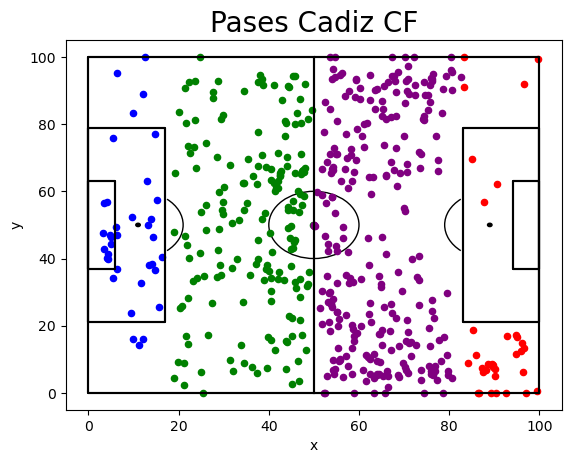

In [82]:
mask13= (
    (df_cad['type_id']==1)
)
df_cad_pases= df_cad[mask13]

df_cad_pases_Zona1= df_cad_pases[df_cad_pases['x']<=17]
df_cad_pases_Zona2= df_cad_pases[(df_cad_pases['x']>=17) & (df_cad_pases['x']<=50)]
df_cad_pases_Zona3= df_cad_pases[(df_cad_pases['x']>=50) & (df_cad_pases['x']<=83)]
df_cad_pases_Zona4= df_cad_pases[df_cad_pases['x']>83]

color_campo = '#000000'
ax_campo = pintar_campo(color_campo) 
ax_campo.set_title("Pases Cadiz CF",
             fontsize=20)

df_cad_pases_Zona1.plot(kind='scatter', x='x', y='y', color='blue', ax = ax_campo)
df_cad_pases_Zona2.plot(kind='scatter', x='x', y='y', color='green', ax = ax_campo)
df_cad_pases_Zona3.plot(kind='scatter', x='x', y='y', color='purple', ax = ax_campo)
df_cad_pases_Zona4.plot(kind='scatter', x='x', y='y', color='red', ax = ax_campo)

# 13. Resumen de conclusiones 
- Raking goleadores: 
  - Como podemos ver en el primer punto del notebook, el máximo anotador fue Lionel Messi (30), en segundo lugar Luis Suárez (26), seguido de Karim Benzema (23), con el mismo número de dianas que Gerard Moreno (23) y cerrando este top cinco Youssef En-Nesyri (18)

- Ranking equipos con más tarjetas:
  - El equipo más amonestado en esta temporada resultó ser el Getafe (126), seguido del Celta de Vigo (107) y cerrando el top tres el Granada CF        (103). Mientras que el equipo menos amonestado fue el Real Madrid          (60).
- Posición media de cada jugador del ATM:
  - Observando la posición media de cada jugador del ATM, se puede observar claramente la formación habitual en aquella temporada a la que más recurrió el Cholo Simeone, formando con dos líneas de cuatro en la defensa y el centro del campo y con dos hombres en la referencia de ataque. El hecho de que se vea muy bien reflejado ese dibujo en el campo es un ejemplo de una de las características que destacan al ATM, esa organización en bloque con todo el equipo muy junto y dejando pocos espacios en las zonas centrales y entre líneas.
- Porcentajes de eventos por zonas del ATM
  - Como bien se puede observar en el notebook, la zona donde el ATM tuvo una mayor disposición de eventos con diferencia fue en la Zona 2, es decir en campo propio. Como he analizado en mi ejercicio 15 un gran número de estos eventos son pases (acciones ofensivas), señal que nos indica que en ataque el conjunto colchonero elaboró buena parte de su ofensiva desde esa zona del campo, pero también que en su fase defensiva fue una de las zonas donde mayor actividad se generó. Una característica también típica del conjunto colchonero, que destaca por su bloque medio donde deja a su rival iniciar con balón desde atrás y cierra filas a la altura de medio campo.
- Porcentajes de eventos por zonas del CAD
  - Para el Cádiz la disposición mayoritariamente también se mostró en la zona de medios, pero sobretodo en mayor medida en la Zona 3 es decir en campo rival. Observando la disposición de pases realizada en mi actividad número 15 podemos observar como junto con la Zona 2 donde se registra una gran actividad ofensiva es en dicha zona del campo teniendo mucha presencia por los carriles laterales, esto nos muestra como organizó el eequipo gaditano la ofensiva en este partido buscando mayormente los carriles exteriores para progresar con el balón, un factor que lo podemos relacionar con la conclusión que hemos sacado anteriormente en el apartado que hacia referencia a la posición media del conjunto colchonero, donde decíamos que se mostraba claramente como las posiciones buscaban cerrar los espacios interiores en la zona de medios dejando las zonas exteriores para que los rivales jugaran.
